In [39]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime as dt

In [40]:
# loading the dataset
appearances = pd.read_csv('C:/Users/acer/Desktop/Datasets/appearances.csv', encoding = 'latin1')
games = pd.read_csv('C:/Users/acer/Desktop/Datasets/games.csv', encoding = 'latin1')
leagues = pd.read_csv('C:/Users/acer/Desktop/Datasets/leagues.csv', encoding = 'latin1')
players = pd.read_csv('C:/Users/acer/Desktop/Datasets/players.csv', encoding = 'latin1')
shots = pd.read_csv('C:/Users/acer/Desktop/Datasets/shots.csv', encoding = 'latin1')
teams = pd.read_csv('C:/Users/acer/Desktop/Datasets/teams.csv', encoding = 'latin1')
teamstats = pd.read_csv('C:/Users/acer/Desktop/Datasets/teamstats.csv', encoding = 'latin1')

In [41]:
df_dict = {'appearances': appearances, 'games': games, 'leagues': leagues, 'players': players, 'shots': shots, 'teams': teams, 'teamstats':teamstats}

In [42]:
# creating functions
def shape_checker(df_list):
    for name, df in df_list.items():
        print(f"The number of row in {name} is {df.shape[0]} and column is {df.shape[1]}")

shape_checker(df_dict)

The number of row in appearances is 356513 and column is 19
The number of row in games is 12680 and column is 34
The number of row in leagues is 5 and column is 3
The number of row in players is 7659 and column is 2
The number of row in shots is 324543 and column is 11
The number of row in teams is 146 and column is 2
The number of row in teamstats is 25360 and column is 16


In [43]:
# creating the function for null checker
def null_checker(df_dict):
    for name, df in df_dict.items():
        null_num = df.isna().sum()
        print(f"The null for {name} is\n {null_num}")

null_checker(df_dict)

games.isna().sum()

The null for appearances is
 gameID           0
playerID         0
goals            0
ownGoals         0
shots            0
xGoals           0
xGoalsChain      0
xGoalsBuildup    0
assists          0
keyPasses        0
xAssists         0
position         0
positionOrder    0
yellowCard       0
redCard          0
time             0
substituteIn     0
substituteOut    0
leagueID         0
dtype: int64
The null for games is
 gameID                0
leagueID              0
season                0
date                  0
homeTeamID            0
awayTeamID            0
homeGoals             0
awayGoals             0
homeProbability       0
drawProbability       0
awayProbability       0
homeGoalsHalfTime     0
awayGoalsHalfTime     0
B365H                 5
B365D                 5
B365A                 5
BWH                   3
BWD                   3
BWA                   3
IWH                  18
IWD                  18
IWA                  18
PSH                  20
PSD                  2

gameID                0
leagueID              0
season                0
date                  0
homeTeamID            0
awayTeamID            0
homeGoals             0
awayGoals             0
homeProbability       0
drawProbability       0
awayProbability       0
homeGoalsHalfTime     0
awayGoalsHalfTime     0
B365H                 5
B365D                 5
B365A                 5
BWH                   3
BWD                   3
BWA                   3
IWH                  18
IWD                  18
IWA                  18
PSH                  20
PSD                  20
PSA                  20
WHH                   6
WHD                   6
WHA                   6
VCH                   4
VCD                   4
VCA                   4
PSCH                  2
PSCD                  2
PSCA                  2
dtype: int64

In [44]:
import missingno as msno

<Axes: >

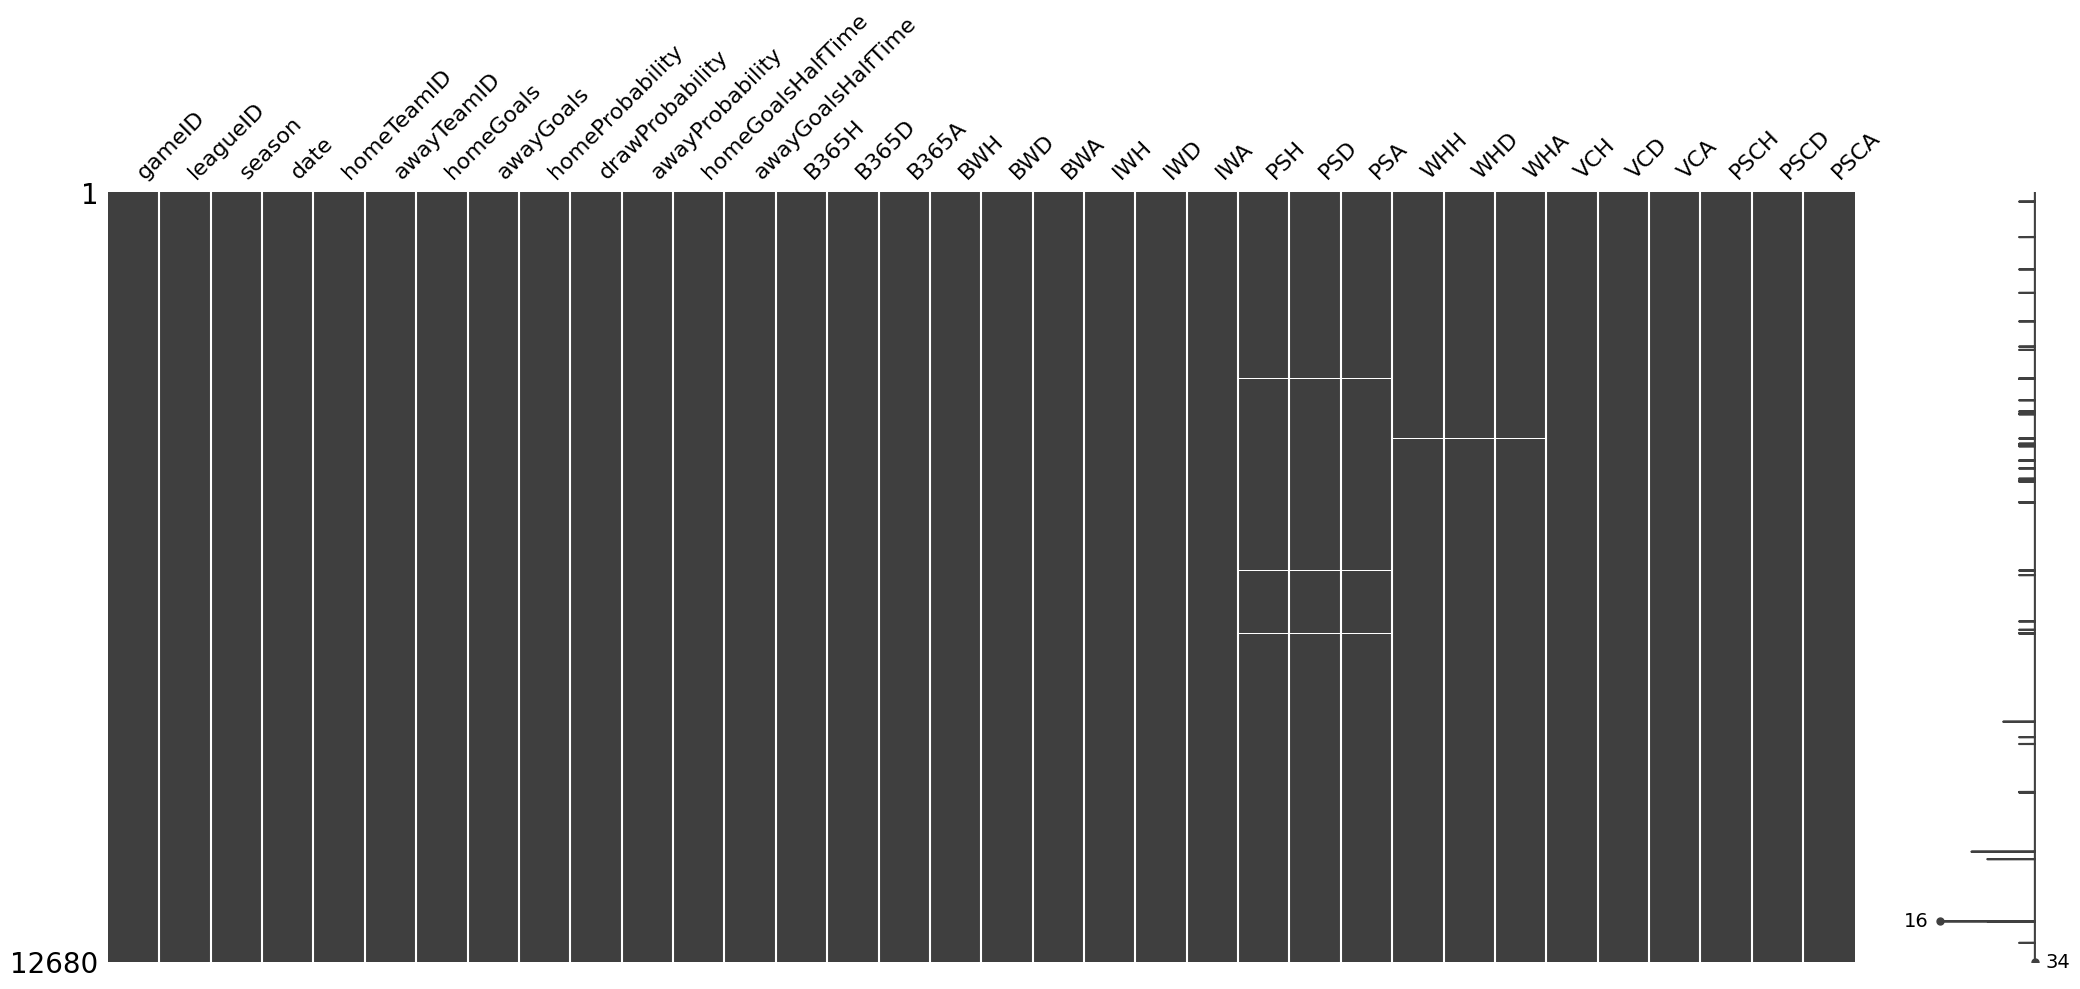

In [45]:
msno.matrix(games)

In [46]:
# columns with missing values in games 
col_games = ['B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD', 'IWA', 'PSH', 'PSD', 'PSA', 'WHH', 'WHD', 'WHA', 'VCH', 'VCD', 'VCA', 'PSCH', 'PSCD', 'PSCA']

In [47]:
# calculating the median of above columns by grouping them by hometeam and awayteam
medians_dict = {
    col: games.groupby(['homeTeamID', 'awayTeamID'])[col].median().to_dict() for col in col_games
}

In [48]:
# function to map and impute missing values
def impute_median(row, col):
    if pd.isnull(row[col]):
        return medians_dict[col].get((row['homeTeamID'], row['awayTeamID']), row[col])
    return row[col]

# imputing the missing values for each column
for col in col_games:
    games[col] = games.apply(lambda row: impute_median(row, col), axis = 1)

In [49]:
games.isna().sum()

gameID               0
leagueID             0
season               0
date                 0
homeTeamID           0
awayTeamID           0
homeGoals            0
awayGoals            0
homeProbability      0
drawProbability      0
awayProbability      0
homeGoalsHalfTime    0
awayGoalsHalfTime    0
B365H                0
B365D                0
B365A                0
BWH                  1
BWD                  1
BWA                  1
IWH                  0
IWD                  0
IWA                  0
PSH                  3
PSD                  3
PSA                  3
WHH                  1
WHD                  1
WHA                  1
VCH                  1
VCD                  1
VCA                  1
PSCH                 0
PSCD                 0
PSCA                 0
dtype: int64

In [50]:
# for the remaining nulls in the games, lets do it by season
season_null = games.groupby('season')[col_games].median().to_dict()
season_null

{'B365H': {2014: 2.2,
  2015: 2.15,
  2016: 2.15,
  2017: 2.15,
  2018: 2.2,
  2019: 2.2,
  2020: 2.35},
 'B365D': {2014: 3.5,
  2015: 3.5,
  2016: 3.6,
  2017: 3.6,
  2018: 3.6,
  2019: 3.6,
  2020: 3.6},
 'B365A': {2014: 3.5,
  2015: 3.5,
  2016: 3.6,
  2017: 3.5,
  2018: 3.4,
  2019: 3.3,
  2020: 3.1},
 'BWH': {2014: 2.2,
  2015: 2.2,
  2016: 2.15,
  2017: 2.15,
  2018: 2.2,
  2019: 2.2,
  2020: 2.35},
 'BWD': {2014: 3.4,
  2015: 3.4,
  2016: 3.5,
  2017: 3.6,
  2018: 3.6,
  2019: 3.6,
  2020: 3.6},
 'BWA': {2014: 3.3,
  2015: 3.4,
  2016: 3.5,
  2017: 3.5,
  2018: 3.4,
  2019: 3.3,
  2020: 3.1},
 'IWH': {2014: 2.2,
  2015: 2.2,
  2016: 2.2,
  2017: 2.2,
  2018: 2.2,
  2019: 2.2,
  2020: 2.4},
 'IWD': {2014: 3.4,
  2015: 3.3,
  2016: 3.5,
  2017: 3.5,
  2018: 3.55,
  2019: 3.6,
  2020: 3.6},
 'IWA': {2014: 3.3,
  2015: 3.3,
  2016: 3.3,
  2017: 3.3,
  2018: 3.4,
  2019: 3.3,
  2020: 3.1},
 'PSH': {2014: 2.22,
  2015: 2.2,
  2016: 2.19,
  2017: 2.21,
  2018: 2.26,
  2019: 2.27,
  202

In [51]:
for col in col_games:
    # Map the medians based on season and fill missing values
    games[col] = games[col].fillna(games['season'].map(season_null[col]))

In [52]:
games.isna().sum()

gameID               0
leagueID             0
season               0
date                 0
homeTeamID           0
awayTeamID           0
homeGoals            0
awayGoals            0
homeProbability      0
drawProbability      0
awayProbability      0
homeGoalsHalfTime    0
awayGoalsHalfTime    0
B365H                0
B365D                0
B365A                0
BWH                  0
BWD                  0
BWA                  0
IWH                  0
IWD                  0
IWA                  0
PSH                  0
PSD                  0
PSA                  0
WHH                  0
WHD                  0
WHA                  0
VCH                  0
VCD                  0
VCA                  0
PSCH                 0
PSCD                 0
PSCA                 0
dtype: int64

In [57]:
try:
    if shots['assisterID'].isnull().any() or np.isinf(shots['assisterID']).any():
        raise ValueError('The values contain non-finite values')
    else:
        shots['assisterID'] = shots['assisterID'].astype(int)

except ValueError as e:
    print(e)
shots.dtypes

The values contain non-finite values


gameID          int64
shooterID       int64
assisterID    float64
minute          int64
situation      object
lastAction     object
shotType       object
shotResult     object
xGoal         float64
positionX     float64
positionY     float64
dtype: object

In [60]:
games.to_csv("games3.csv", index=False, sep=",", encoding="utf-8")

In [65]:
shots['assisterID'].fillna(0, inplace = True)

In [66]:
shots['assisterID'] = shots['assisterID'].astype(int)

In [67]:
shots.dtypes

gameID          int64
shooterID       int64
assisterID      int64
minute          int64
situation      object
lastAction     object
shotType       object
shotResult     object
xGoal         float64
positionX     float64
positionY     float64
dtype: object

In [68]:
shots.to_csv("shots3.csv", index = False, sep = ",", encoding = "utf-8")

In [70]:
game_co = games.columns.to_list()

In [71]:
game_co

['gameID',
 'leagueID',
 'season',
 'date',
 'homeTeamID',
 'awayTeamID',
 'homeGoals',
 'awayGoals',
 'homeProbability',
 'drawProbability',
 'awayProbability',
 'homeGoalsHalfTime',
 'awayGoalsHalfTime',
 'B365H',
 'B365D',
 'B365A',
 'BWH',
 'BWD',
 'BWA',
 'IWH',
 'IWD',
 'IWA',
 'PSH',
 'PSD',
 'PSA',
 'WHH',
 'WHD',
 'WHA',
 'VCH',
 'VCD',
 'VCA',
 'PSCH',
 'PSCD',
 'PSCA']

In [72]:
app_col = appearances.columns.to_list()
app_col

['gameID',
 'playerID',
 'goals',
 'ownGoals',
 'shots',
 'xGoals',
 'xGoalsChain',
 'xGoalsBuildup',
 'assists',
 'keyPasses',
 'xAssists',
 'position',
 'positionOrder',
 'yellowCard',
 'redCard',
 'time',
 'substituteIn',
 'substituteOut',
 'leagueID']

In [75]:
shots['assisterID'] = shots['assisterID'].replace(0, None)         

In [77]:
shots.dtypes

gameID          int64
shooterID       int64
assisterID     object
minute          int64
situation      object
lastAction     object
shotType       object
shotResult     object
xGoal         float64
positionX     float64
positionY     float64
dtype: object

In [79]:
shots.to_csv("shots4.csv", index = False, sep = ",", encoding = "utf-8")

In [83]:
teamstats.dtypes

gameID             int64
teamID             int64
season             int64
date              object
location          object
goals              int64
xGoals           float64
shots              int64
shotsOnTarget      int64
deep               int64
ppda             float64
fouls              int64
corners            int64
yellowCards      float64
redCards           int64
result            object
dtype: object

In [85]:
teamstats['yellowCards'] = teamstats['yellowCards'].replace("NA", None)

In [87]:
teamstats.to_csv("teamstats.csv", index = False, encoding = "latin1")